In [3]:
import os
import json

In [7]:
results_dir = "/sailhome/agam/boxing-gym/results/"
exp = "oed" #oed
# env = "hyperbolic_temporal_discount"
env = "location_finding"
# env = "death_process"
# env = "irt"
# env = "dugongs"
# env = "survival"
# env = "peregrines"
#env = "morals"
goal = "direct"
model = "gpt-4o-boxloop" #"claude-3-7-sonnet-20250219" # use boxloop here and perform this analysis in oed.ipynb
seeds = [1,2,3,4,5] 

In [8]:
files = [os.path.join(results_dir, env, f"{goal}_{model}_{exp}_True_{seed}.json") for seed in seeds]
files_no_prior = [os.path.join(results_dir, env, f"{goal}_{model}_{exp}_False_{seed}.json") for seed in seeds]
# regret_files = [os.path.join(results_dir, env, f"regret_{goal}_{model}_{exp}_True_{seed}.json") for seed in seeds]
# regret_files_no_prior = [os.path.join(results_dir, env, f"regret_{goal}_{model}_{exp}_False_{seed}.json") for seed in seeds]

In [9]:
data = []
for file in files:
    
    # if not os.path.exists(file):
    #     continue
    with open(file, "r") as f:
        data.append(json.load(f))
        
# data_no_prior = []
# for file in files_no_prior:
#     if not os.path.exists(file):
#         print(f"File {file} does not exist")
#         continue
#     print(file)
#     with open(file, "r") as f:
#         data_no_prior.append(json.load(f))
# regrets = []
# for file in regret_files:
#     if not os.path.exists(file):
#         continue

#     print(file)
#     with open(file, "r") as f:
#         regrets.append(json.load(f))
# regrets_no_prior = []
# for file in regret_files_no_prior:
#     if not os.path.exists(file):
#         continue
#     print(file)
#     with open(file, "r") as f:
#         regrets_no_prior.append(json.load(f))

In [280]:
len(data)

1

In [265]:
#len(data_no_prior)

In [10]:
import numpy as np
observations = [d['data']['observations'] for d in data]
# observations_no_prior = [d['data']['observations'] for d in data_no_prior]

successes = [d['data']['successes'] for d in data]
# successes_no_prior = [d['data']['successes'] for d in data_no_prior]
for i, s in enumerate(successes):
    print(i, sum(s))

errs, stds = [], []
for d in data:
    errs.append([])
    stds.append([])
    for r in d['data']['results']: 
        errs[-1].append(r[0][0])
        stds[-1].append(r[0][1])
print(errs)
errs_no_prior, stds_no_prior = [], []
# for d in data_no_prior:
#     errs_no_prior.append([])
#     stds_no_prior.append([])
#     for r in d['data']['results']: 
#         errs_no_prior[-1].append(r[0][0])
#         stds_no_prior[-1].append(r[0][1])

errs = np.array(errs)
stds = np.array(stds)
# errs_no_prior = np.array(errs_no_prior)
# stds_no_prior = np.array(stds_no_prior)

if env == "hyperbolic_temporal_discount" and "direct" in goal:
    errs = 1 - errs
    # errs_no_prior = 1 - errs_no_prior
if env == "peregrines":
    errs = errs ** 0.5
    # errs_no_prior = errs_no_prior ** 0.5 
if env == "survival":
    errs = 1 - errs
    # errs_no_prior = 1 - errs_no_prior
if env == "morals":
    print("removing")
    errs = 1 - errs


mean_score = np.mean(errs, axis=0)
ci_95 = 1.96 * np.std(errs, axis=0) / np.sqrt(len(errs))
mean_score_no_prior = None
ci_95_no_prior = None
# if len(errs_no_prior) > 0:
    # mean_score_no_prior = np.mean(errs_no_prior, axis=0)
    # ci_95_no_prior = 1.96 * np.std(errs_no_prior, axis=0) / np.sqrt(len(errs_no_prior))



print(mean_score[0])
print(ci_95[0])
# print(mean_score_no_prior[0])
# print(ci_95_no_prior[0])

0 10
[[75.5092646601768, 88.7190804259909, 201.26153893676994]]
75.5092646601768
0.0


In [12]:
!pip install seaborn

In [13]:
# plot data as a lineplot with error bands
import matplotlib.pyplot as plt
import seaborn as sns

ValueError: x and y must have same first dimension, but have shapes (6,) and (3,)

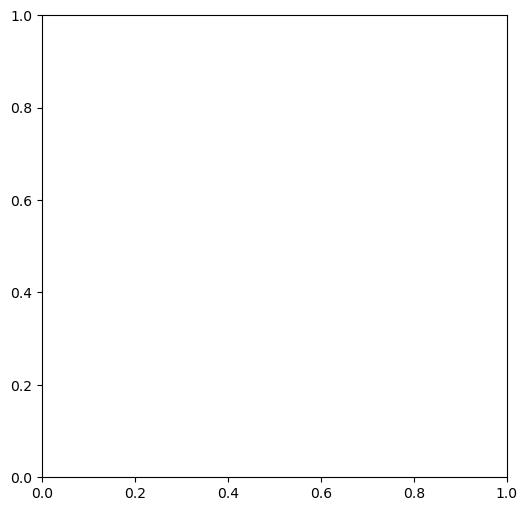

In [14]:
colors = sns.color_palette()

exp_list = [0, 1, 3, 5, 7, 10]

def plot_lines(x_list, mean1, ci1, mean2, ci2, label1, label2, xlabel, ylabel, title, save_path):

    # Plot data
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = sns.color_palette("colorblind")

    ax.plot(x_list, mean1, label=label1, color=colors[0], linestyle='-', linewidth=2)
    ax.fill_between(x_list, np.array(mean1) - np.array(ci1), np.array(mean1) + np.array(ci1), color=colors[0], alpha=0.3)

    if mean2 is not None:
        ax.plot(x_list, mean2, label=label2, color=colors[1], linestyle='--', linewidth=2)
        ax.fill_between(x_list, np.array(mean2) - np.array(ci2), np.array(mean2) + np.array(ci2), color=colors[1], alpha=0.3)

    # Customize the grid, legend, and labels
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize the legend
    legend = ax.legend(loc='upper left', frameon=True, framealpha=0.9, fontsize=12)
    frame = legend.get_frame()
    frame.set_color('white')

    #  Ensure x-axis is visible
    ax.xaxis.set_visible(True)
    ax.spines['bottom'].set_visible(True)

    # set x-axis ticks
    ax.set_xticks(exp_list)

    # Set white background
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    # Add horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
    # save the plot
    plt.savefig(save_path)

save_path = os.path.join('../plots', f"{env}_{goal}_{model}_{exp}_oed_error.png")
plot_lines(exp_list, mean_score, ci_95, mean_score_no_prior, ci_95_no_prior, "With Prior", "Without Prior", "Number of Observations", "Error", "Error with and without Prior", save_path)
print(mean_score)


In [ ]:
# print len of queries in data
print(len(data[0]['data']['queries']))

10


In [ ]:
# print(np.array(eigs).shape)
# print(np.array(eigs_no_prior).shape)
# print(np.array(eig_regrets).shape)
# print(np.array(eigregrets_no_prior).shape)

In [ ]:
# if env == "irt":
#     #TODO: hacky fix for irt
#     observation_nums = list(range(9))
# else:
#     observation_nums = list(range(10))
# eigs = np.array(eigs)
# eigs_no_prior = np.array(eigs_no_prior)
# # clip eigs at 100, -100
# # eigs = np.clip(eigs, -100, 100)
# # eigs_no_prior = np.clip(eigs_no_prior, -100, 100)
# if len(eigs) > 0:
#     mean_eigs = np.mean(eigs, axis=0)
#     ci_95_eigs = 1.96 * np.std(eigs, axis=0) / np.sqrt(len(eigs))
#     if len(eigs_no_prior) > 0:
#         mean_eigs_no_prior = np.mean(eigs_no_prior, axis=0)
#         ci_95_eigs_no_prior = 1.96 * np.std(eigs_no_prior, axis=0) / np.sqrt(len(eigs_no_prior))
#     else:
#         mean_eigs_no_prior = None
#         ci_95_eigs_no_prior = None
#     save_path = os.path.join('../plots', f"{env}_{goal}_{model}_{exp}_oed_eigs.png")
#     plot_lines(observation_nums, mean_eigs, ci_95_eigs, mean_eigs_no_prior, ci_95_eigs_no_prior, "With Prior", "Without Prior", "Number of Observations", "Expected IG", "Expected IG with and without Prior", save_path)

In [ ]:
# regret_prior = [regret['eigs_regret'] for regret in regrets]
# regret_no_prior = [regret['eigs_regret'] for regret in regrets_no_prior]
# regret_prior = eig_regrets
# regret_no_prior = eigregrets_no_prior
# if env == "irt":
#     #TODO: hacky fix for irt
#     observation_nums = list(range(9))
# else:
#     observation_nums = list(range(10))

# mean_regret = None
# if len(regret_prior) > 0:
#     mean_regret = np.mean(regret_prior, axis=0)
#     ci_95_regret = 1.96 * np.std(regret_prior, axis=0) / np.sqrt(len(regret_prior))
#     mean_regret_no_prior = None
#     if len(regret_no_prior) > 0:
#         mean_regret_no_prior = np.mean(regret_no_prior, axis=0)
#         ci_95_regret_no_prior = 1.96 * np.std(regret_no_prior, axis=0) / np.sqrt(len(regret_no_prior))
#     else:
#         mean_regret_no_prior = None
#         ci_95_regret_no_prior = None

#     save_path = os.path.join('../plots', f"{env}_{goal}_{model}_{exp}_oed_regret.png")
#     plot_lines(observation_nums, mean_regret, ci_95_regret, mean_regret_no_prior, ci_95_regret_no_prior, "With Prior", "Without Prior", "Number of Observations", "Expected IG", "Expected IG Regret with and without Prior", save_path)


In [ ]:
mean_score

array([0.5, 0.5, 0.5, 0.6, 0.5, 0.4])

In [ ]:
mean_score_no_prior

In [15]:
# Metrics to report in the table:
print(env)
print(f"{'Metric':<40} &  \\\\")
# 1. Mean error at 10 observations
mean_error_10 = mean_score[-1]
ci_95_error_10 = ci_95[-1]
print(f"{'Prior Mean Error at 10 Observations':<40} & {mean_error_10} ({ci_95_error_10})") 
# 2. Mean error at 10 observations without prior
if mean_score_no_prior is not None:
    mean_error_10_no_prior = mean_score_no_prior[-1]
    ci_95_error_10_no_prior = ci_95_no_prior[-1]
    print(f"{'No Prior Mean Error at 10 Observations':<40} & {mean_error_10_no_prior} ({ci_95_error_10_no_prior}) \\\\")
# 3. Mean error at 0 observations
mean_error_0 = mean_score[0]
ci_95_error_0 = ci_95[0]
print(f"{'Prior Mean Error at 0 Observations':<40} & {mean_error_0} ({ci_95_error_0})")
# 4. Mean error at 0 observations without prior
if mean_score_no_prior is not None:
    mean_error_0_no_prior = mean_score_no_prior[0]
    ci_95_error_0_no_prior = ci_95_no_prior[0]
    print(f"{'No Prior Mean Error at 0 Observations':<40} & {mean_error_0_no_prior} ({ci_95_error_0_no_prior}) \\\\")
# # 5. Mean regret over all observations
# if mean_regret is not None:
#     mean_regret_all = np.mean(mean_regret)
#     ci_95_regret_all = np.mean(ci_95_regret)
#     print(f"{'Mean Regret over all Observations':<40} & {mean_regret_all} ({ci_95_regret_all})")
# # 6. Mean regret over all observations without prior
# if mean_regret_no_prior is not None:
#     mean_regret_all_no_prior = np.mean(mean_regret_no_prior)
#     ci_95_regret_all_no_prior = np.mean(ci_95_regret_no_prior)
#     print(f"{'No Prior Mean Regret over all Observations':<40} & {mean_regret_all_no_prior} ({ci_95_regret_all_no_prior}) \\\\")

# # Print the table

location_finding
Metric                                   &  \\
Prior Mean Error at 10 Observations      & 201.26153893676994 (0.0)
Prior Mean Error at 0 Observations       & 75.5092646601768 (0.0)
